# **Introduction to Time Series**

### **Code Introduction**

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import io
import warnings
from plotnine import *
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
warnings.simplefilter('ignore')


np.set_printoptions(suppress=True) #Suppress scientific notation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ^DJI.csv to ^DJI.csv
Saving time_series_covid19_confirmed_global_narrow.csv to time_series_covid19_confirmed_global_narrow.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving ^DJI.csv to ^DJI.csv


## **I. Time Series Definition**

A ***time series data*** is a collection of observations (behavior) for a single subject (entity) at different time intervals equally or no. 


*Examples* of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average (stock market index that measures the stock performance.

Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.

*Particularity of Time Series:*

Time series data have a natural temporal ordering. This makes time series analysis distinct from cross-sectional studies, in which there is no natural ordering of the observations (e.g. explaining people's wages by reference to their respective education levels, where the individuals' data could be entered in any order). In fact, a *cross-section* is a group of observations of multiple entities at a single time. Time series analysis is also distinct from spatial data analysis where the observations typically relate to geographical locations (e.g. accounting for house prices by the location as well as the intrinsic characteristics of the houses). It's finally different from *panel data* or longitudinal data is multi-dimensional data involving measurements over time. Panel data contains observations of multiple phenomena obtained over multiple time periods for the same firms or individuals



Examples of a Time Series Data : 
- EKG:
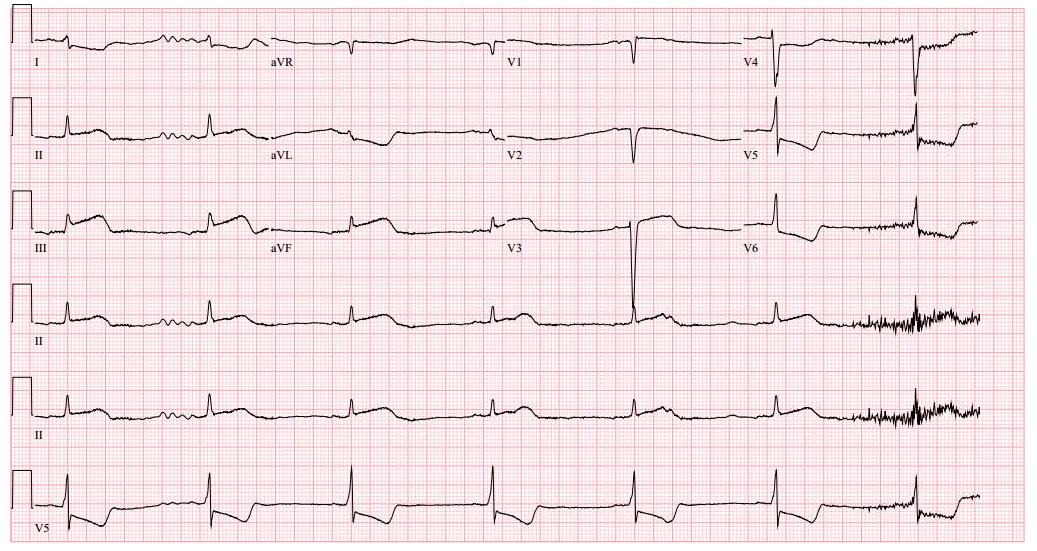

- Dow Jones Industrial Average (Stock Market):


In [4]:
data_DJ = pd.read_csv(io.BytesIO(uploaded['^DJI.csv']) ,index_col='Date')
data_DJ

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-04,27634.630859,27727.449219,27612.080078,27649.779297,27649.779297,218200000
2019-12-05,27736.050781,27745.199219,27562.800781,27677.789063,27677.789063,208600000
2019-12-06,27839.679688,28035.849609,27839.679688,28015.060547,28015.060547,223310000
2019-12-09,27987.050781,28010.419922,27906.140625,27909.599609,27909.599609,217000000
2019-12-10,27900.650391,27949.019531,27804.000000,27881.720703,27881.720703,213250000
...,...,...,...,...,...,...
2020-12-24,30155.919922,30209.669922,30099.300781,30199.869141,30199.869141,145570000
2020-12-28,30283.230469,30525.560547,30283.230469,30403.970703,30403.970703,302490000
2020-12-29,30492.070313,30588.789063,30274.240234,30335.669922,30335.669922,357610000


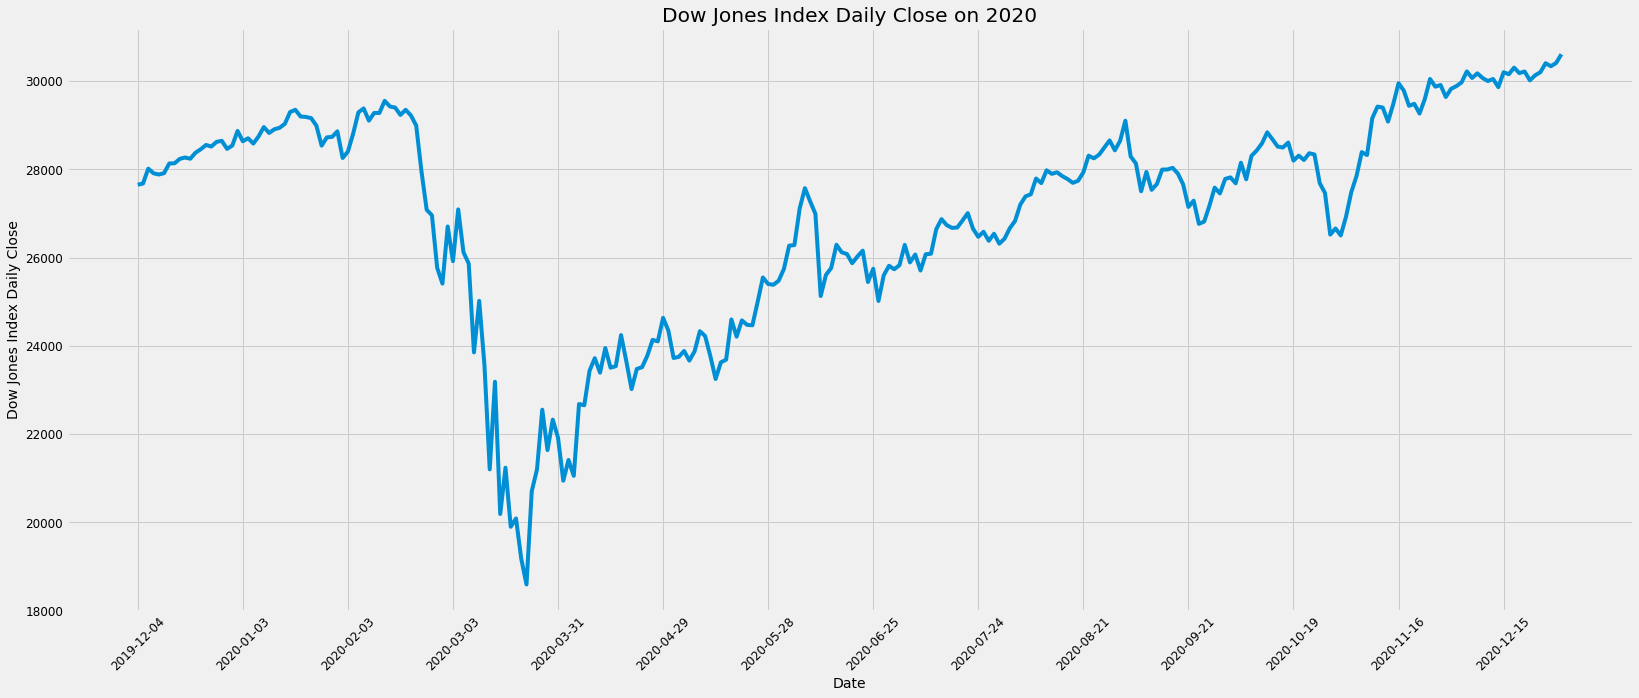

In [5]:
# Plot DJ index closing for each day
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot(data_DJ.index, data_DJ.Close)
ax.set_xticklabels(data_DJ.index)
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
ax.set_xticks(ticks[::20])
ax.set_xticklabels(labels[::20])
ax.set(xlabel="Date",
       ylabel="Dow Jones Index Daily Close",
       title="Dow Jones Index Daily Close on 2020")
_=plt.xticks(rotation=45)

- Corona Cases:

In [ ]:
data_corona = pd.read_csv(io.BytesIO(uploaded['time_series_covid19_confirmed_global_narrow.csv']))
israel_corona = data_corona.loc[data_corona['Country/Region'] == "Israel"].drop(["Province/State", "Lat", "Long"], axis=1)
israel_corona

,Country/Region,Date,Value
52549,Israel,2021-01-03,441542
52550,Israel,2021-01-02,434799
52551,Israel,2021-01-01,428510
52552,Israel,2020-12-31,423262
52553,Israel,2020-12-30,416584
...,...,...,...
52892,Israel,2020-01-26,0
52893,Israel,2020-01-25,0
52894,Israel,2020-01-24,0
52895,Israel,2020-01-23,0


In [ ]:
# Little modifications on the Israel Corona Data
israel_corona_date = israel_corona.drop("Country/Region", axis=1).set_index("Date")
israel_corona_date = israel_corona_date.sort_values(by='Date')

# Compute the New Corona Cases number for each day
israel_corona_date["Value"] = israel_corona_date["Value"].astype(int)
difference = israel_corona_date.diff()
difference = difference.replace(np.NaN, 0)
difference

,Value
Date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-12-30,4186.0
2020-12-31,6678.0
2021-01-01,5248.0


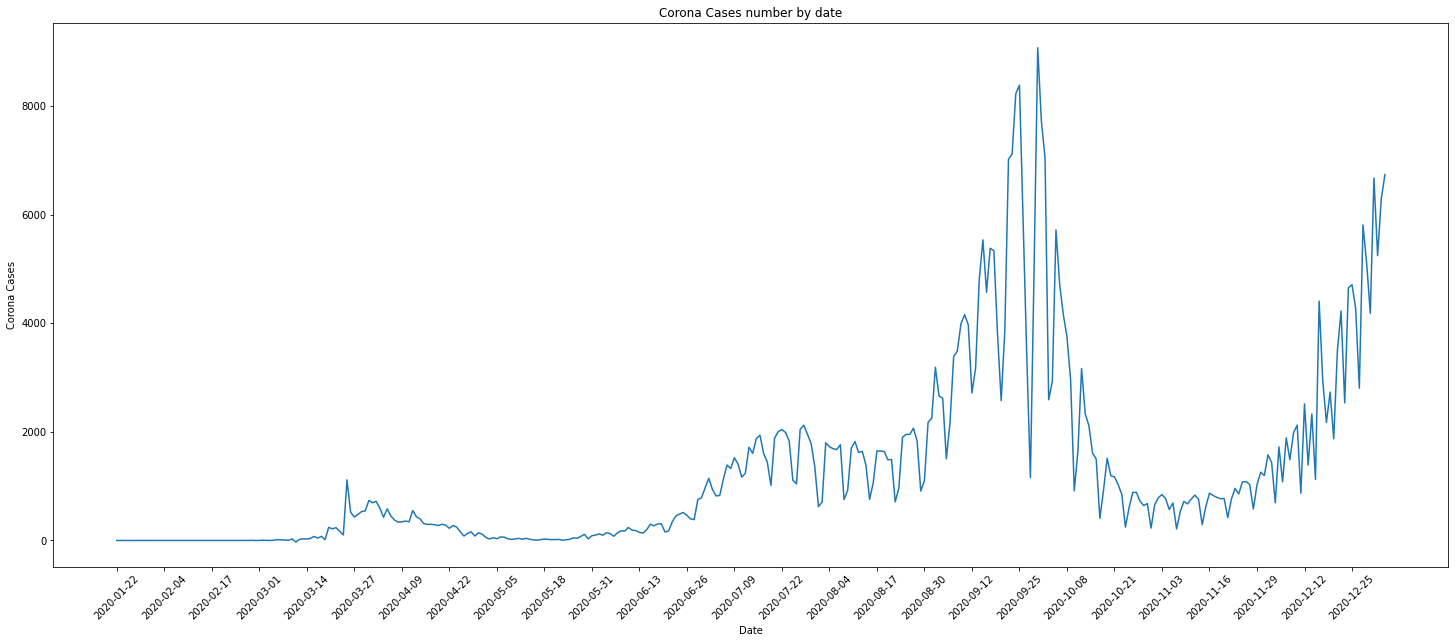

In [ ]:
# Plot the Corona Cases Number for each day
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot(difference.index, difference.Value)
ax.set_xticklabels(difference.index)
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
ax.set_xticks(ticks[::13])
ax.set_xticklabels(labels[::13])
ax.set(xlabel="Date",
       ylabel="Corona Cases",
       title="Corona Cases number by date")
_=plt.xticks(rotation=45) 

## **II. Time Series Analysis**


Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. 
There are several types of motivation and data analysis available for time series which are appropriate for different purposes.

Time series analysis can be applied to real-valued, continuous data, discrete numeric data, or discrete symbolic data (i.e. sequences of characters, such as letters and words in the English language).
In the context of statistics, econometrics, quantitative finance, seismology, meteorology, and geophysics the primary goal of time series analysis is forecasting. In the context of signal processing, control engineering and communication engineering it is used for signal detection. Other application are in data mining, pattern recognition and machine learning, where time series analysis can be used for clustering, classification, query by content,anomaly detection as well as forecasting.

Time series forecasting is the use of a model to predict future values based on previously observed values. While regression analysis is often employed in such a way as to test relationships between one more different time series, this type of analysis is not usually called "time series analysis," which refers in particular to relationships between different points in time within in single series.

***So, how to deal with Time Series Data ?***

1. Preprocessing : 
- Set the dates as index of our data (if it's not already the case)
- Drop columns that we don't need
- Checking missing values 
...

2. Visualisation of our data 
Refers to separating a time series into trend, seasonal effects, and remaining variabilityAssumptions.

Some important questions to consider when looking at a time series are:

- Is there a trend, meaning that, on average, the measurements tend to increase (or decrease) over time?
- Is there seasonality, meaning that there is a regularly repeating pattern of highs and lows related to calendar time such as seasons, quarters, months, days of the week, and so on?
- Are there outliers? In regression, outliers are far away from your line. With time series data, your outliers are far away from your other data.
- Is there a long-run cycle or period unrelated to seasonality factors?
- Is there constant variance over time, or is the variance non-constant?
- Are there any abrupt changes to either the level of the series or the variance?

More specifically, visualizing time series data provides a preliminary tool for detecting if data


- Has a time trend;
In addition to containing a non-zero mean, time series data may also have a deterministic component that is proportionate to the time period. When this occurs, the time series data is said to have a time trend.
A time series plot which looks like it centers around an increasing or decreasing line, like that in the plot above, suggests the presence of a time trend.
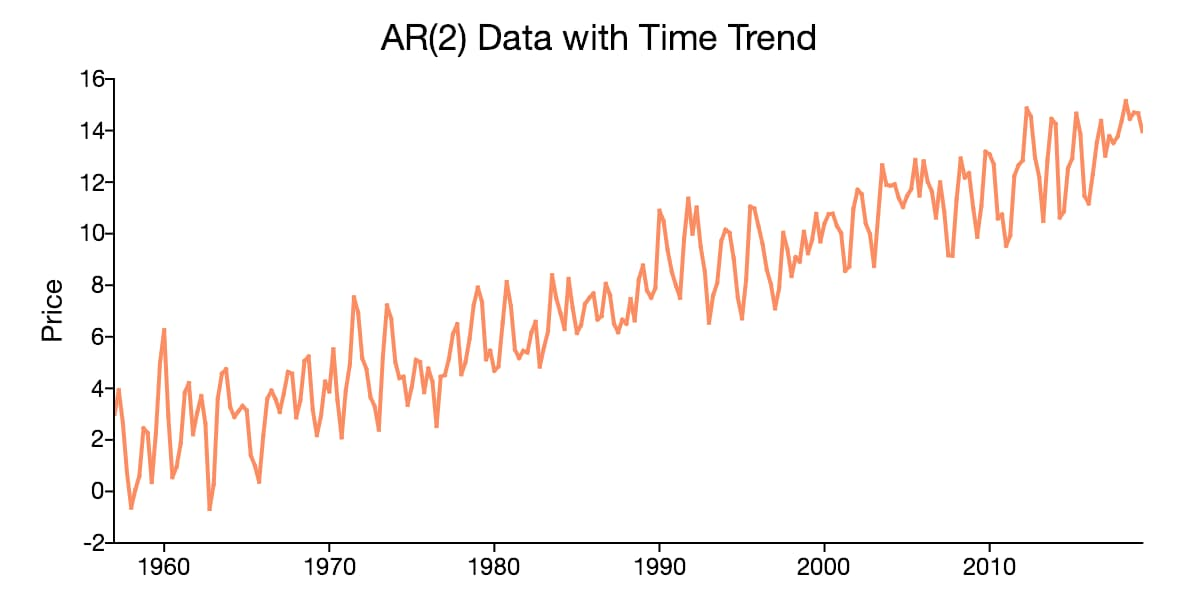

- Exhibits seasonality;
Seasonality is another characteristic of time series data that can be visually identified in time series plots. Seasonality occurs when time series data exhibits regular and predictable patterns at time intervals that are smaller than a year.
An example of a time series with seasonality is retail sales, which often increase between September to December and will decrease between January and February.
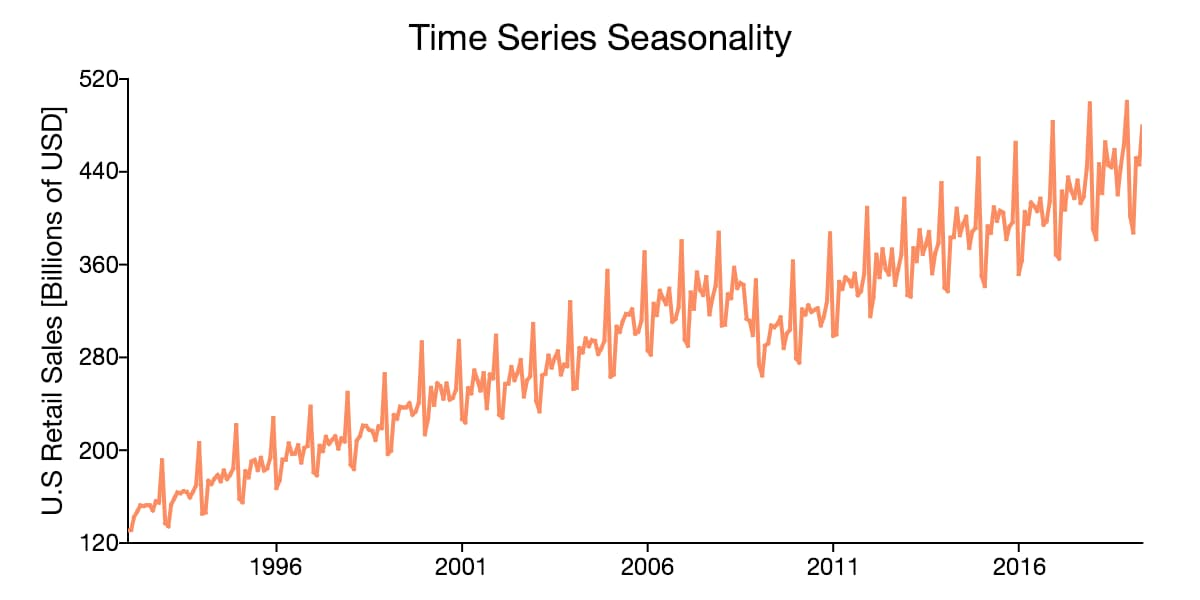

- Demonstrates structural breaks.
Sometimes time series data shows a sudden change in behavior at a certain point in time. For example, many macroeconomic indicators changed sharply in 2008 after the start of the global financial crisis. These sudden changes are often referred to as structural breaks or non-linearities.
These structural breaks can create instability in the parameters of a model. This, in turn, can diminish the validity and reliability of that model.
Structural breaks in the mean of a time series will appear in graphs as sudden shifts in the level of the data at certain breakpoints. For example, in the time series plot above there is a clear jump in the mean of the data which around the start of 1980.
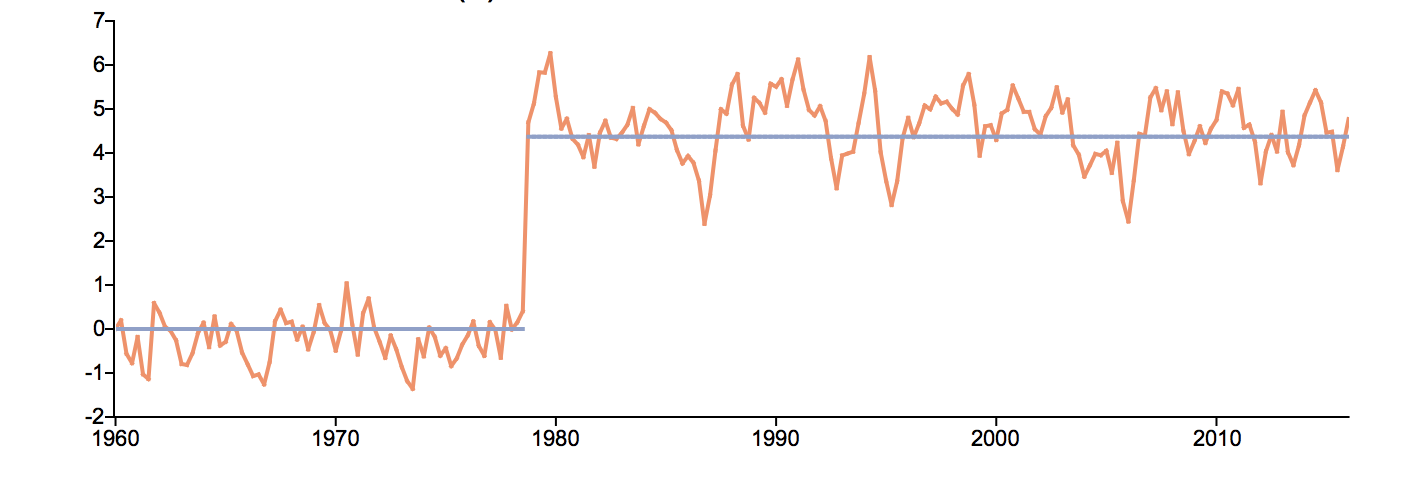

- Calculate the Autocorrelation that measures a set of current values against a set of past values to see if they correlate. 

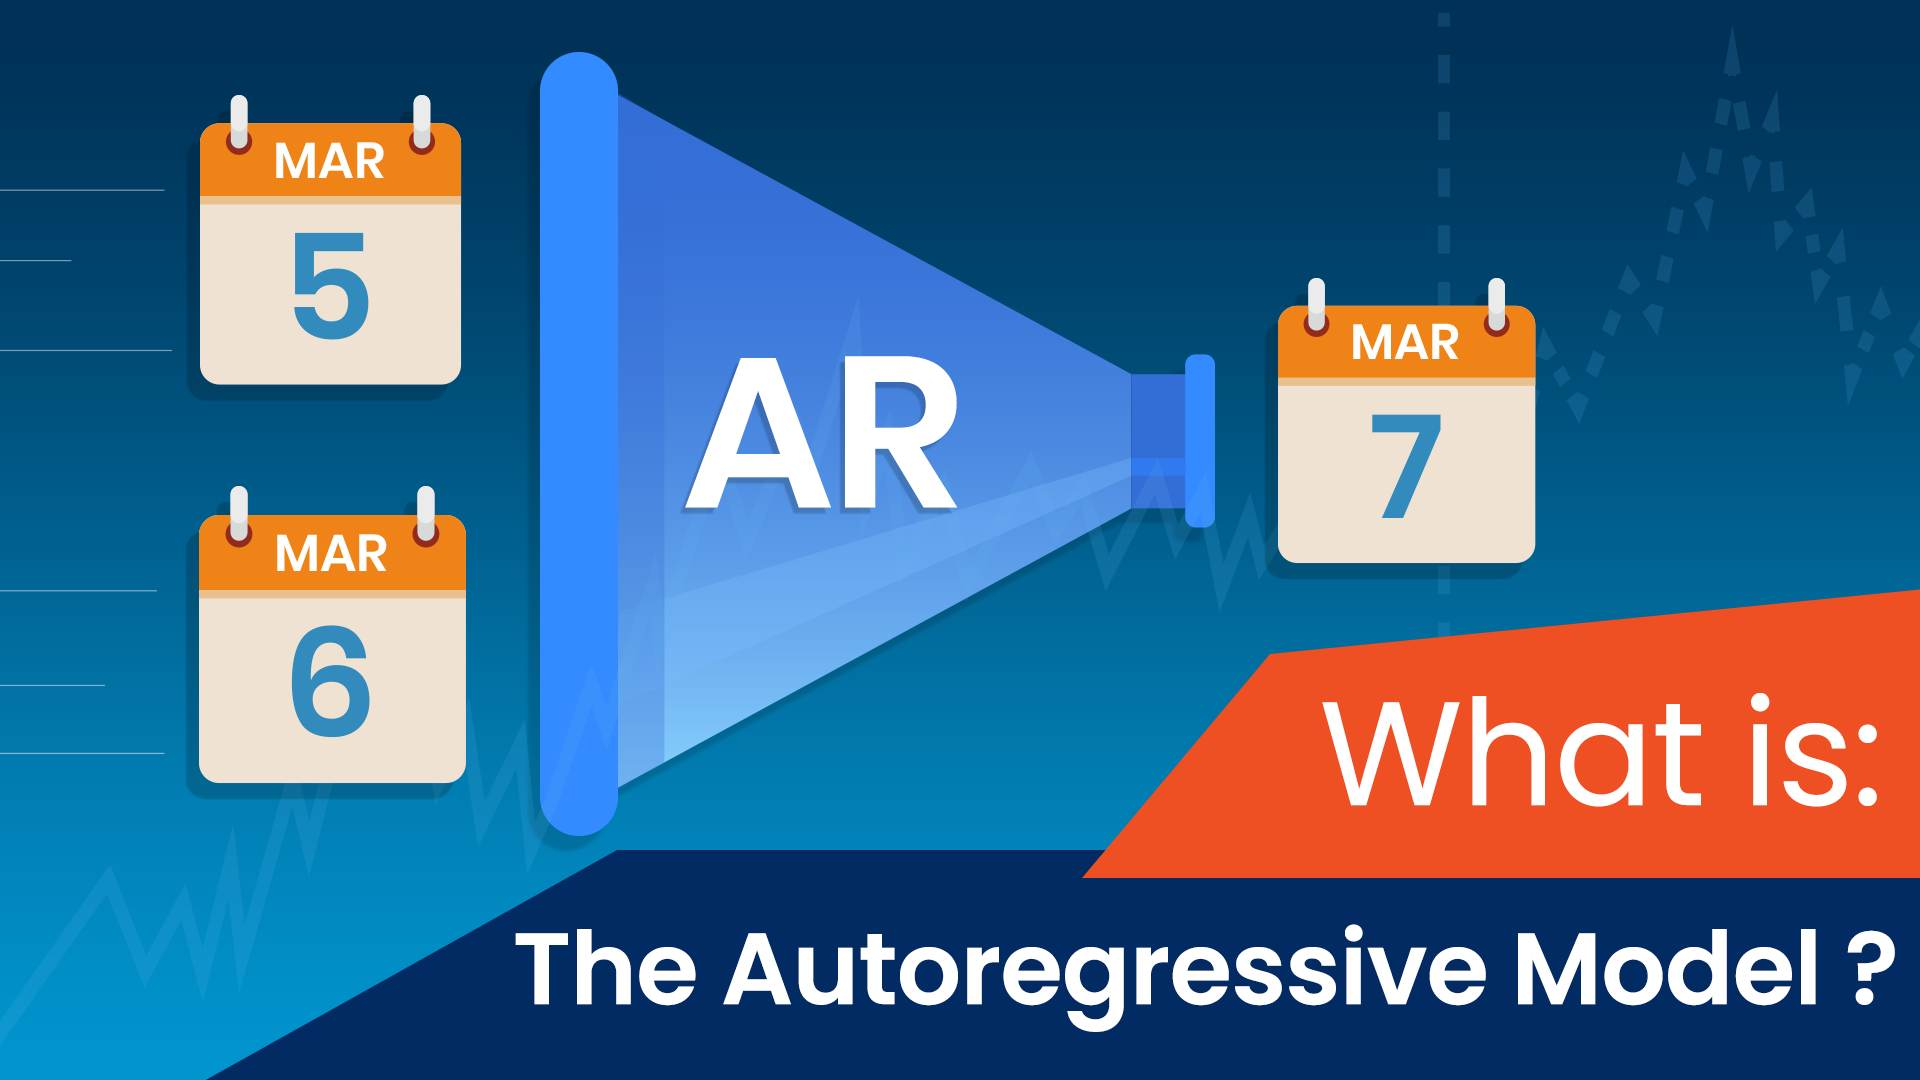

3. Choosing a Forecasting Method for Time Series Data :

* Autoregression (AR)
* Moving Average (MA)
* Autoregressive Moving Average (ARMA)
* Autoregressive Integrated Moving Average (ARIMA)
* Exponential Smoothing (ES)
* Seasonal Autoregressive Integrated Moving-Average (SARIMA)
* Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
* Vector Autoregression (VAR)
* Vector Autoregression Moving-Average (VARMA)
* Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
* Simple Exponential Smoothing (SES)
* Holt Winter’s Exponential Smoothing (HWES)

[Explanations and code examples for the first 11 algorithms](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)

Neural Network
* CNN
* LSTM

[Explanation on Prophet](https://facebook.github.io/prophet/docs/quick_start.html) : 
[Forecasting Tool of Facebook](https://facebook.github.io/prophet/)
* Prophet







4. Model Checking. Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model. and do some computations like RMSE or Maximum likelihood. 



## **III. Examples of Time Series Analysis**

1. Preprocessing

In [6]:
# Compute the average between high and low values of the DJ Index for each day
data_DJ_avg = pd.DataFrame((data_DJ.High + data_DJ.Low)/2, columns=["Average"])
data_DJ_avg.index = data_DJ.index
data_DJ_avg.index = pd.to_datetime(data_DJ_avg.index)
data_DJ_avg

,Average
Date,
2019-12-04,27669.764648
2019-12-05,27654.000000
2019-12-06,27937.764649
2019-12-09,27958.280274
2019-12-10,27876.509765
...,...
2020-12-24,30154.485352
2020-12-28,30404.395508
2020-12-29,30431.514649


In [7]:
# Verify that there aren't any nan values
data_DJ_avg.size - data_DJ_avg.dropna().size

0

2. Visualisation

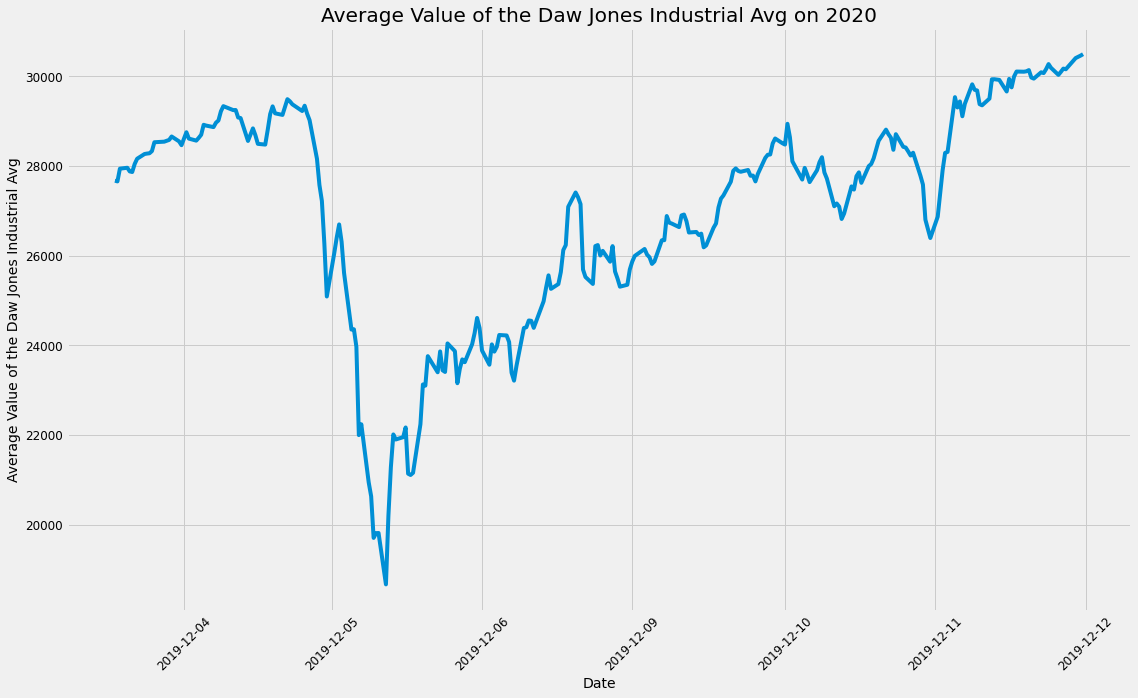

In [8]:
# Plot the DJ Value according to the date
fig, ax = plt.subplots(figsize=(17, 10))
plt.plot(data_DJ_avg.index, data_DJ_avg.Average)
ax.set_xticklabels(data_DJ.index)
ax.set(xlabel="Date",
       ylabel="Average Value of the Daw Jones Industrial Avg",
       title="Average Value of the Daw Jones Industrial Avg on 2020")
_=plt.xticks(rotation=45) 

Autocorrelation measures a set of current values against a set of past values to see if they correlate. 

We can calculate the correlation for current time-series​ observations with observations of previous time steps called lags.
If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.

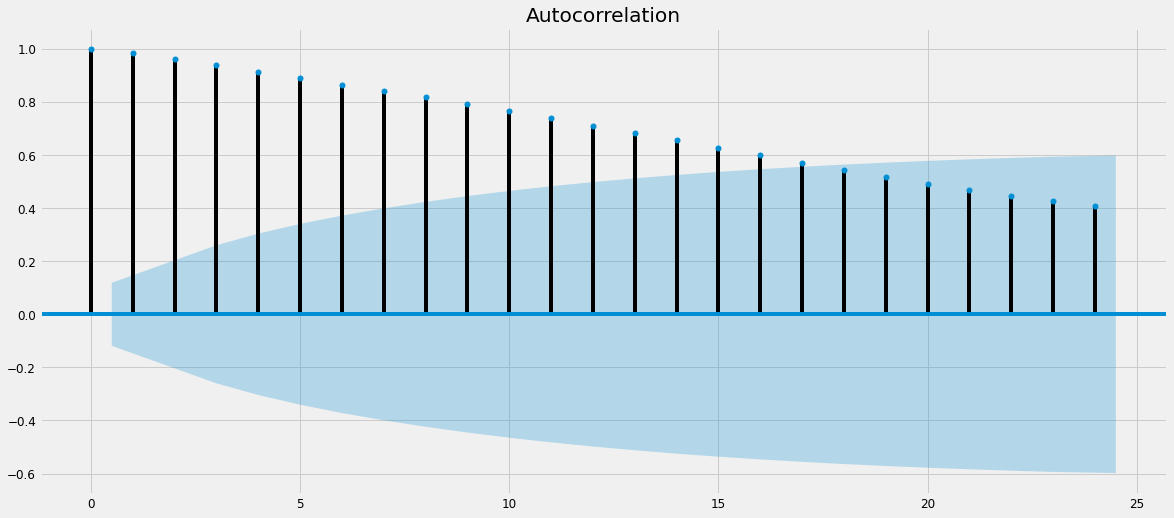

In [57]:
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(data_DJ_avg.Average, lags=24)
plt.show()

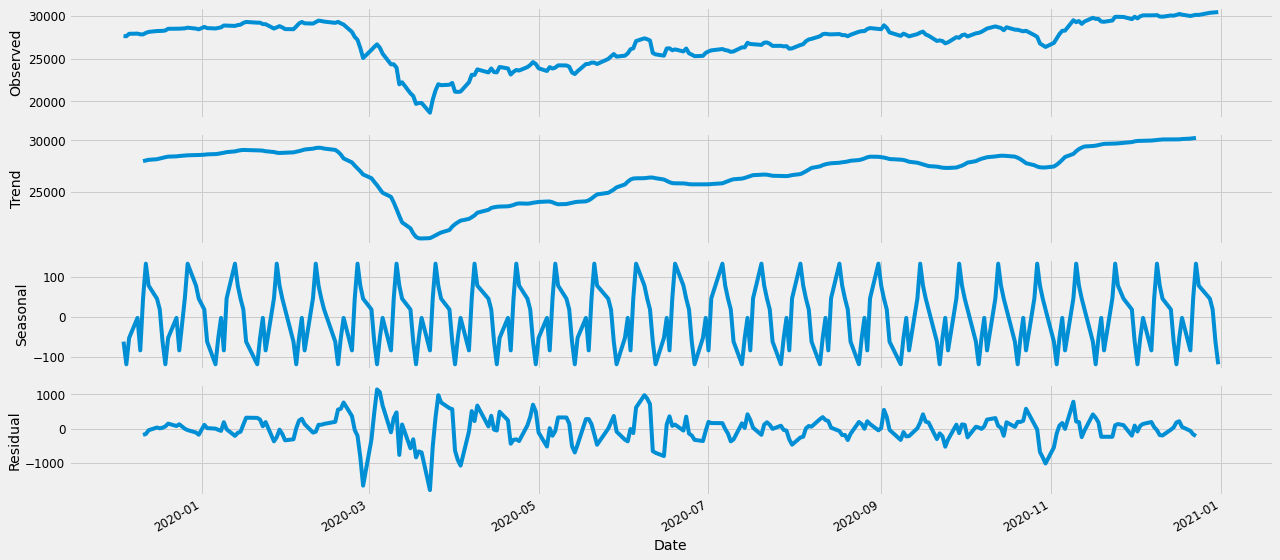

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data_DJ_avg.Average, model='additive', freq=10)
fig = decomposition.plot()
plt.show()

3. Choosing the Forecast Method

- ARIMA :

 ***Autoregressive integrated moving average (ARIMA)*** model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend).When the seasonality shows in a time series, the seasonal-differencing could be applied to eliminate the seasonal component.

The autoregressive integrated moving average model (ARIMA) is a fundamental univariate time series model. The ARIMA model is made up of three key components

The autoregressive component is the relationship between the current dependent variable the dependent variable at lagged time periods.
The integrated component refers to the use of transforming the data by subtracting past values of a variable from the current values of a variable in order to make the data stationary.
The moving average component refers to the dependency between the dependent variable and past values of a stochastic term.

The ARIMA data is described by the order of each of these components with the notation ARIMA(p, d, q) where:

- p is the number of autoregressive lags included in the model.
- d is the order of differencing used to make the data stationary.
- q is the number of moving average lags included in the model.

- ARIMA :

In [68]:
# split into train and test sets
X = data_DJ_avg.shape[0]
size = int(X * 0.66)
train, test = data_DJ_avg.Average[0:size], data_DJ_avg.Average[size:X]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1, typ='levels')
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Average   No. Observations:                  178
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1332.577
Method:                       css-mle   S.D. of innovations            431.484
Date:                Tue, 12 Jan 2021   AIC                           2679.154
Time:                        12:29:07   BIC                           2701.426
Sample:                             1   HQIC                          2688.186
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7037     43.642      0.016      0.987     -84.833      86.240
ar.L1.D.Average     0.1488      0.075      1.996      0.047       0.003       0.295
ar.L2.D.Average     0.1196      

First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

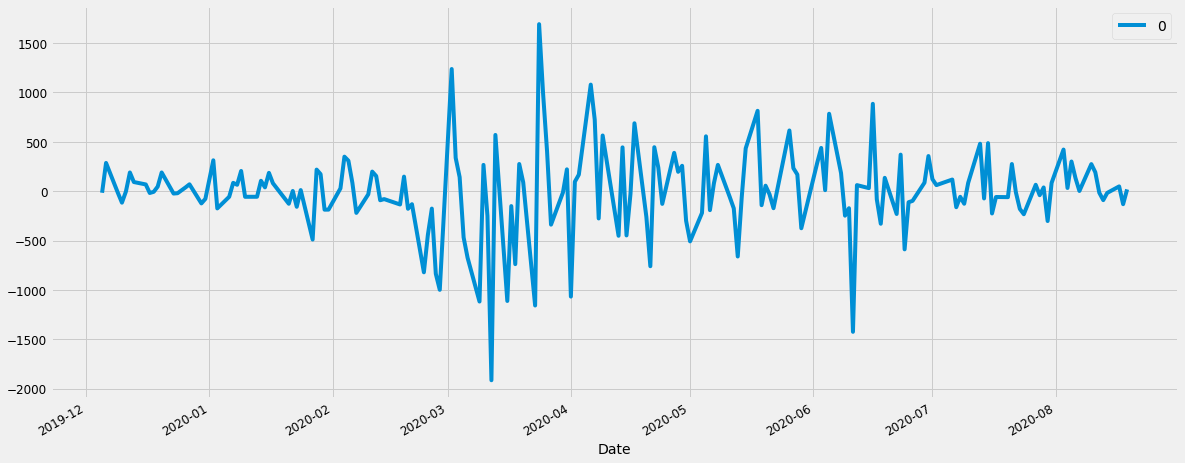

In [36]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

- Rolling ARIMA with walk forward validation:

The ARIMA model can be used to forecast future time steps.

We can use the predict() function on the ARIMAResults object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

If we used 100 observations in the training dataset to fit the model, then the index of the next time step for making a prediction would be specified to the prediction function as start=101, end=101. This would return an array with one element containing the prediction.

We also would prefer the forecasted values to be in the original scale, in case we performed any differencing (d>0 when configuring the model). This can be specified by setting the typ argument to the value ‘levels’: typ=’levels’.

Alternately, we can avoid all of these specifications by using the forecast() function, which performs a one-step forecast using the model.

We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.

We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration.

Putting this all together, below is an example of a rolling forecast with the ARIMA model in Python.

In [37]:
# evaluate an ARIMA model using a walk-forward validation
from sklearn.metrics import mean_squared_error
from math import sqrt

history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

4. Evaluate our Model predictions

In [27]:
#  evaluate forecasts or simple arima
tab = pd.DataFrame(test)
tab['pred'] = list(yhat)
rmse = sqrt(mean_squared_error(test, tab['pred']))
print('Test RMSE for Simple ARIMA: %.3f' % rmse)
mean = data_DJ_avg.Average.mean()
print(rmse/mean)

#  evaluate forecasts of walk forward arima
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE for walk forward ARIMA: %.3f' % rmse)
mean = data_DJ_avg.Average.mean()
print(rmse/mean)

Test RMSE for Simple ARIMA: 1413.313
0.05238656402268159
Test RMSE for walk forward ARIMA: 283.509
0.010508703572404285


5. Check predictions on plot

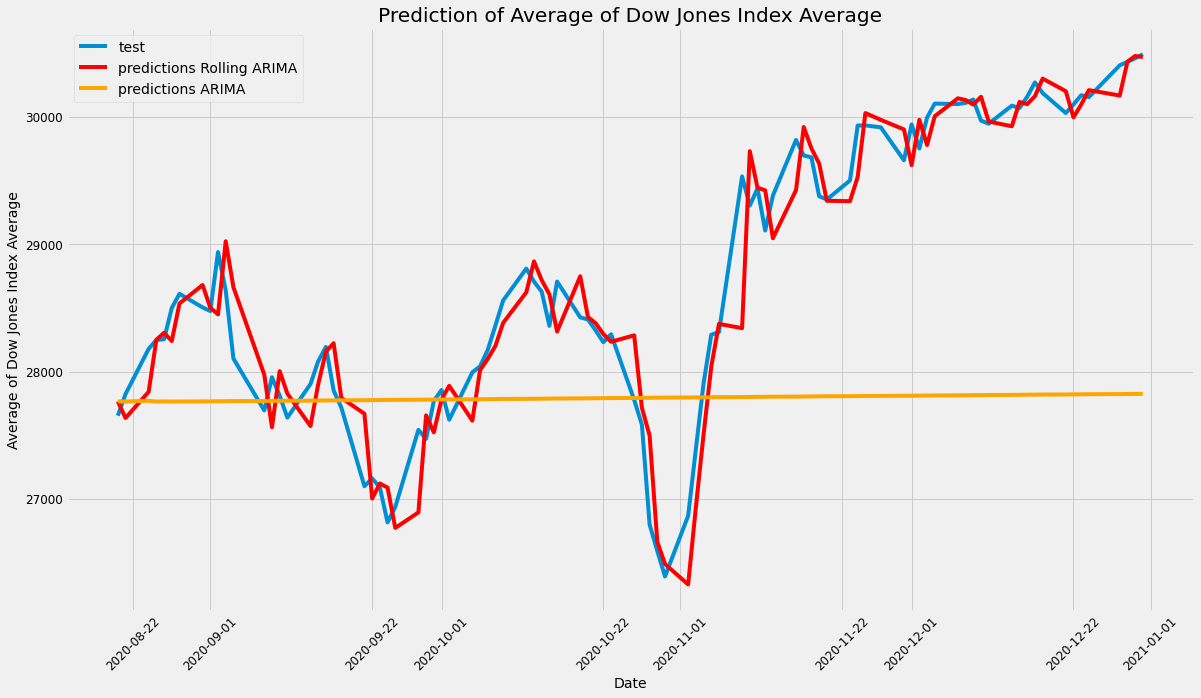

In [69]:
# plot forecasts against actual outcomes
for i in range(len(predictions)):
  predictions[i] = float(predictions[i])
test = pd.DataFrame(test)
test['pred'] = predictions
test['pred_2'] = list(yhat)

fig, ax = plt.subplots(figsize=(18, 10))
plt.plot(test['Average'], label="test")
plt.plot(test['pred'], color='red', label="predictions Rolling ARIMA")
plt.plot(test['pred_2'], color='orange', label="predictions ARIMA")
ax.set(xlabel="Date",
       ylabel="Average of Dow Jones Index Average",
       title="Prediction of Average of Dow Jones Index Average")
ax.legend()
_=plt.xticks(rotation=45) 



## **IV. Prophet**
Few Words on Forescating Tool From Facebook : Prophet 
Prophet follows the sklearn model API. They create an instance of the Prophet class and then call its fit and predict methods.
The Prophet forecast automatically detects the seasonal cycles. The prophet function also provides options to explicitly model weekly and/or yearly seasonality, account for holidays, and to specify changepoints where discontinuities in the time series are expected. 

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.


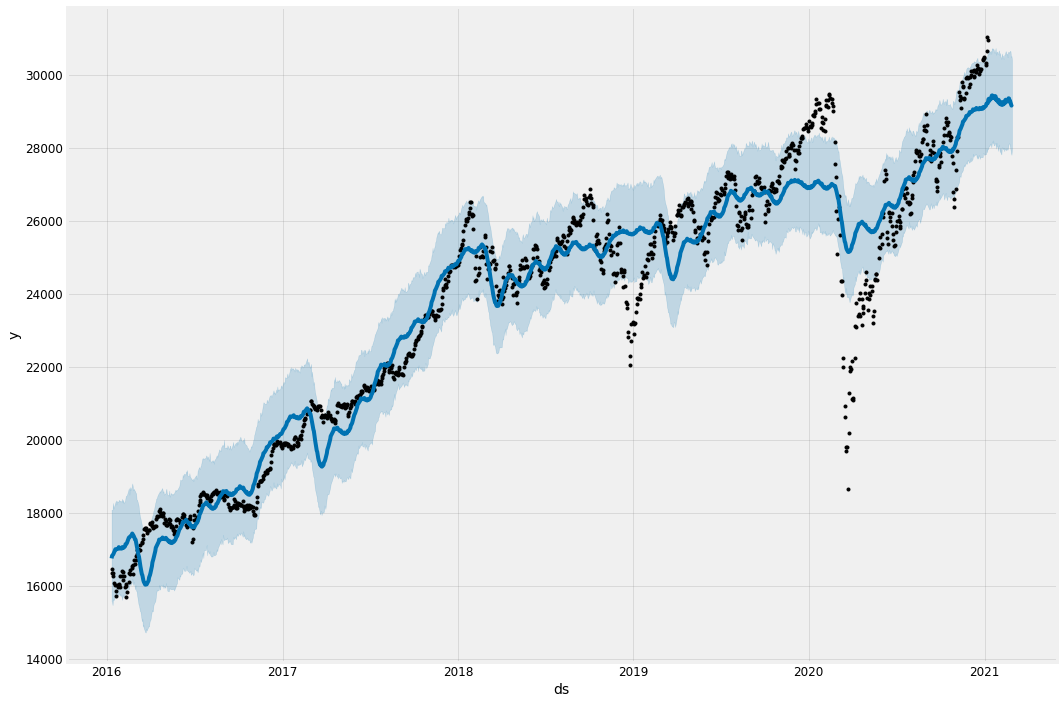

In [162]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
data_prophet = data_DJ_avg.reset_index()
data_prophet.columns = ['ds', 'y']
m.fit(data_prophet)
future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)
fig1 = m.plot(forecast, figsize=(15, 10))
plt.show()

In [144]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
317,2021-02-15,31015.859086,30448.549582,31591.066930
318,2021-02-16,31073.836126,30528.468012,31691.604063
319,2021-02-17,31026.126515,30465.805771,31627.886880
320,2021-02-18,30856.507621,30288.456578,31475.444982
321,2021-02-19,30721.727939,30137.702390,31340.326926


In [141]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)